<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

امیرحسین محمودی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 2
<br>
سوال 2
- تشخیص هرزنامه ها
<br>
200 نمره
    
    
____


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
در این تمرین می خواهیم مدلی ایجاد کنیم تا پیام های هرز را از پیام های معمولی تشخیص دهیم.
داده های داده شده حاوی دو ستون هستند .یکی ستون متن پیام و دیگری برچسب پیام که Spam نشان دهنده هرز بودن پیام و ham نشان دهنده پاک بودن پیام است.
</div>

# Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# add what you want

# Load data

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
داده ها را در فرمت مناسب زبان فارسی بخوانید
</div>

In [2]:
df = pd.read_csv('/Users/dinasaur/Documents/ML/ML_HW2/Q2/emails.csv')
with open('/Users/dinasaur/Documents/ML/ML_HW2/Q2/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = [word.strip() for word in f.readlines()]
df.head()

,text,label
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham


# A. Exploratory Analysis (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

در صورتی که داده شما شامل مقادیر خالی است آن ها را حذف کنید.

یک ستون دیگر به داده ها اضافه کنید و طول هر پیام را در آن درج کیند.

نمودار تعداد پیام های هرز و غیر هرز برحسب طول پیام را رسم کنید.
</div>

In [3]:
df = df.dropna()
df['message_len'] = df['text'].apply(lambda x: len(x))
df.head()

,text,label,message_len
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham,146
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham,347
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham,360
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham,330
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham,290


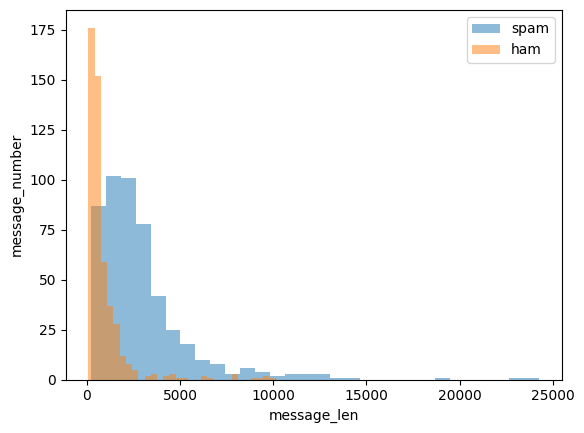

In [4]:
spam = df[df['label'] == 'spam']
ham = df[df['label'] == 'ham']
plt.hist(spam['message_len'], bins=30, alpha=0.5, label='spam')
plt.hist(ham['message_len'], bins=30, alpha=0.5, label='ham')
plt.xlabel('message_len')
plt.ylabel('message_number')
plt.legend(loc='upper right')
plt.show()

# B. Text Cleaning (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

حال نیاز است تا [واژه های پالایشی](https://fa.wikipedia.org/wiki/%D9%88%D8%A7%DA%98%D9%87_%D9%BE%D8%A7%D9%84%D8%A7%DB%8C%D8%B4%DB%8C_(%D9%BE%D8%B1%D8%AF%D8%A7%D8%B2%D8%B4_%D8%B2%D8%A8%D8%A7%D9%86_%D8%B7%D8%A8%DB%8C%D8%B9%DB%8C))
(stop words) 
را به همراه بعضی علامت ها از متن ها حذف کنیم.
برای حذف علائم می توانید از کتابخانه string  استفاده کنید.

 می توانید فهرست کلمات پالایشی انگلیسی 
 ( با استفاده از  کتابخانه NLTK) 
 همراه با 
  فهرست کلمات پالایشی زبان فارسی  که در پوشه تمرین قراره داده شده است 
([منبع و اطلاعات بیشتر](https://github.com/ziaa/Persian-stopwords-collection))
 استفاده کنید.

 تابع زیر را به شکلی تکمیل کنید که با گرفتن یک متن کلمات پالایشی و علائم را از متن حذف کند.
 
 حال این تابع را روی داده های خود اجرا کنید و نتیجه را در ستونی به نام text_new ذخیره کنید.


</div>

In [5]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
def text_process(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    english_stopwords = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in english_stopwords)
    persian_stopwords = set()
    with open('/Users/dinasaur/Documents/ML/ML_HW2/Q2/stopwords.txt', 'r', encoding='utf-8') as file:
        for line in file:
            persian_stopwords.add(line.strip())
    text = ' '.join(word for word in text.split() if word not in persian_stopwords)
    return text
df['processed_text'] = df['text'].apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dinasaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df

,text,label,message_len,processed_text
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham,146,﻿ممنون سامان آزاد شرکت سراسری قبول نشدم میخواس...
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham,347,﻿سلام کریمی آزمونارشد تموم یکم راهنمایی خوام م...
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham,360,﻿درود حاج وحیدی بنده بعنوان دکتری تاریخ دستی ت...
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham,330,﻿با سلام احترام تقدیر مسولین محترم سایت تابناک...
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham,290,﻿با سلام اینجانب دستگاه خودرو پراید 131 شماره ...
...,...,...,...,...
995,﻿\nبسمه تعالی\n\nسازمان زیباسازی شهرداری استان...,spam,756,﻿ بسمه تعالی سازمان زیباسازی شهرداری استان تهر...
996,﻿\n\nبه مناسبت فرا رسیدن میلاد دخت پیامبر گرام...,spam,779,﻿ مناسبت فرا رسیدن میلاد دخت پیامبر گرامی اسلا...
997,﻿\nدرود هموطن من\n\n \n\nتست رایگان \n\n ...,spam,772,﻿ درود هموطن تست رایگان تحویل اکانت پرداخت افت...
998,﻿\n\n *درج **لینک در 8700 وبلاگ\n *\n\n...,spam,710,﻿ درج لینک 8700 وبلاگ درج لینک تبلیغات متنی صف...


# C. Word Cloud (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
حال می خواهیم ابر کلمات هر دسته را رسم کنیم تا کلمات کلیدی هرزنامه ها را به صورت چشمی بررسی کنیم.

برای اینکار ابتدا با مفهوم [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) آشنا می شویم.
در واقع نیاز داریم تا جملات را به یک سری token (مفهومی شبیه به کلمه)
بشکنیم.

برای ساخت ابر کلمات نیاز است تا هر جمله راه به token هایی تبدیل کنیم.
سپس تمام token های پیام های هرز  را در یک رشته با فاصله کنار هم قرار دهیم.
همین کار را برای دسته پیام های پاک نیز انجام می دهیم.
حال با استفاده از این رشته ها می توان ابر کلمات هر دسته را ایجاد کرد.
</div>

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
جهت تبدیل جملات به token  میتوان از ابزار های کتابخانه NLTK استفاده کرد.

اما ما برای بالا بردن دقت کار از کتابخانه [هضم](https://www.roshan-ai.ir/hazm/docs/)
 که برای زبان فارسی توسعه داده شده است استفاده می کنیم.
</div>

In [7]:
from __future__ import unicode_literals
import warnings
warnings.filterwarnings('ignore')

from hazm import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def tokenize(text):
    sentences = sent_tokenize(text)
    tokens = [word_tokenize(sentence) for sentence in sentences]
    return tokens
spam_tokens = df[df['label'] == 'spam']['processed_text'].apply(tokenize).sum()
ham_tokens = df[df['label'] == 'ham']['processed_text'].apply(tokenize).sum()
spam_tokens = [token for sublist in spam_tokens for token in sublist]
ham_tokens = [token for sublist in ham_tokens for token in sublist]
spam_text = ' '.join(spam_tokens)
ham_text = ' '.join(ham_tokens)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای رسم ابر کلمات به زبان انگلیسی می توان از کتابخانه WordCloud استفاده کرد.این کتابخانه از زبان فارسی پشتیبانی نمی کند

برای رسم ابر کلمات در زبان فارسی از کتابخانه  [WordCloud_fa](https://pypi.org/project/wordcloud-fa/)
استفاده می کنیم.
</div>


In [9]:
from wordcloud_fa import WordCloudFa
def add_stop_words_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    return stopwords
if isinstance(stopwords, bool):
    stopwords = []
stopwords = add_stop_words_from_file('/Users/dinasaur/Documents/ML/ML_HW2/Q2/stopwords.txt')
spam_wordcloud = WordCloudFa(stopwords=stopwords).generate(spam_text)
ham_wordcloud = WordCloudFa(stopwords=stopwords).generate(ham_text)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
ابر کلمات دو دسته هرز و غیر هرز را رسم کنید
</div>

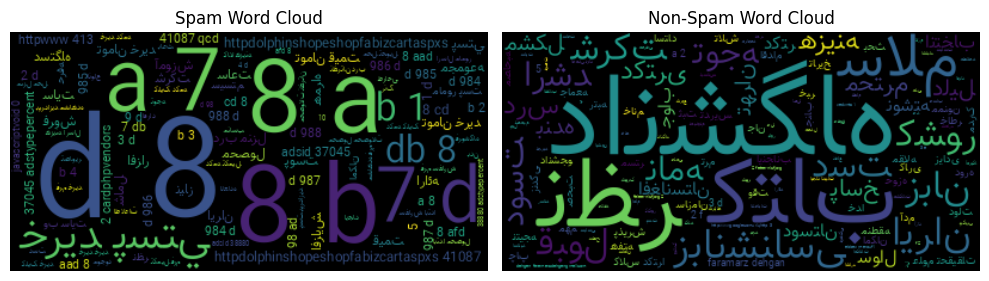

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Spam Word Cloud')
plt.tight_layout()
plt.show()

# D. Vectorization (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از جملات برای یادگیری ماشین نیاز است تا آن ها را به شکل برداری تبدیل کنیم.برای این کار روش های مختلفی وجود دارد.


 ما در اینجا از روش  [فراوانی وزنی تی‌اف-آی‌دی‌اف](https://fa.wikipedia.org/wiki/%D9%81%D8%B1%D8%A7%D9%88%D8%A7%D9%86%DB%8C_%D9%88%D8%B2%D9%86%DB%8C_%D8%AA%DB%8C%E2%80%8C%D8%A7%D9%81-%D8%A2%DB%8C%E2%80%8C%D8%AF%DB%8C%E2%80%8C%D8%A7%D9%81)
  استفاده می کنیم.برای اینکار می توانید از [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) کتابخانه sklearn استفاده کنید.
  
  برای دریافت اسم فیچر ها می توانید از دستور get_feature_names_out روی تبدیل کننده بردار استفاده کنید.

In [11]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
feature_names = vectorizer.get_feature_names_out()

# E. Data Preparation (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از داده ها نیاز است تا دسته هر داده را به شکل عددی ذخیره کنیم.

</div>


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
categories = ['spam', 'ham']
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
متغیر های  پیشبینی و هدف را ایجاد کرده و به شکل مناسب آن ها برای آموزش و تست جدا کنید.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()

# F. Model Training (80 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با استفاده از روش هایی که تا اینجا یاد گرفتید(SVM , Decision Tree, Random Forest) مدل خود را آموزش دهید و معیار های آن ها را با هم مقایسه کنید.

برای روش SVM ماتریس در هم ریختگی را رسم کنید.

برای روش درخت تصمیم نمودار درخت خود را در یک فایل pdf خروجی بگیرید.
</div>

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score
def results(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy_score:', accuracy_score(y_test, y_pred))
    print('precision_score:', precision_score(y_test, y_pred))
    print('roc_auc_score:', roc_auc_score(y_test, y_pred))

Confusion Matrix for SVM:
[[94  2]
 [ 6 98]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        96
           1       0.98      0.94      0.96       104

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

accuracy_score: 0.96
precision_score: 0.98
roc_auc_score: 0.9607371794871795
Confusion Matrix for Decision Tree:
[[83 13]
 [10 94]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        96
           1       0.88      0.90      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200

accuracy_score: 0.885
precision_score: 0.8785046728971962
roc_auc_score: 0.8842147435897435
Confusion Matrix for Random Forest:
[[91  5]
 [ 7 97]]
              precisio

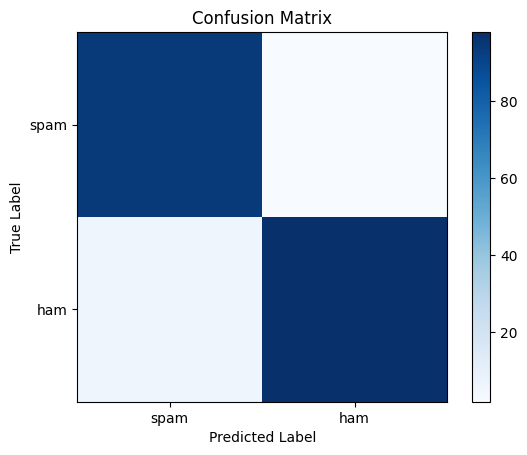

True

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import os
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Confusion Matrix for SVM
print("Confusion Matrix for SVM:")
results(y_test, svm_pred)
# Confusion Matrix for Decision Tree
print("Confusion Matrix for Decision Tree:")
results(y_test, dt_pred)
# Confusion Matrix for Random Forest
print("Confusion Matrix for Random Forest:")
results(y_test, rf_pred)

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm_pred, classes=categories)

# Decision Tree to a PDF file
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, class_names=categories)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("decision_tree.pdf")


# G. Predictor function (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
یک تابع ایجاد کنید که با دریافت مدل ، تبدیل کننده برداری و یک متن به شما بگوید که آیا این پیام هرز است یا خیر.

تابع خود را با ورودی های داده شده تست کنید.
</div>

In [21]:
def isSpam(model, vectorizer, texts):
    X = vectorizer.transform(texts).toarray()
    y_pred = model.predict(X)
    predicted_labels = encoder.inverse_transform(y_pred)
    return predicted_labels

In [22]:
samples=['سلام محمود خوبی؟نگران شدم','این محصول را ازینجا خریدپستی کنید']

In [23]:
predicted_labels = isSpam(svm, vectorizer, samples)
print(predicted_labels)

['ham' 'spam']
